# Koordinatensysteme
Bei der Arbeit mit 3D-Bilddaten sprechen wir oft von X, Y und Z, wenn wir Bilddimensionen beschreiben. Je nachdem, mit welcher Software man arbeitet, werden diese Dimensionen etwas unterschiedlich angegeben. Dieses Notebook gibt einen Überblick über zwei verschiedene im Fachgebiet etablierte Methoden. Wir werden die beiden Systeme als "_ZYX-System_" und "_012-System_" bezeichnen. Python-Bibliotheken wie numpy und scipy folgen dem _012-System_. Software wie ImageJ, CLIJ und clesperanto folgt dem _ZYX-System_.

Wir beginnen mit dem Öffnen eines 3D-Bildstapels.

In [1]:
import numpy as np
from skimage.io import imread
import scipy.ndimage as ndi
import pyclesperanto_prototype as cle
from scipy.linalg import inv

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

image.shape

(192, 256, 256)

Dieses Bild hat eine Form von (192, 256, 256). Diese Zahlen sind nach dem 012-System sortiert, das keine Begriffe wie "Breite", "Höhe" und "Tiefe" definiert. Im ZYX-System hat dieser Bildstapel 192 Scheiben. Jede dieser Scheiben ist 256 Pixel hoch und 256 Pixel breit. Daher interpretiert das ZYX-System die oben gedruckten Zahlen in umgekehrter Reihenfolge.

Wir werden jetzt einen Z-Schnitt aus dem 3D-Datensatz extrahieren und visualisieren. Im 012-System nehmen wir einen Schnitt aus dem Stapel in der ersten (Index 0) Dimension. Er hat die Schichtposition Z=100 (ZYX-System) oder Position 100 entlang der Dimension 0 (012-System).

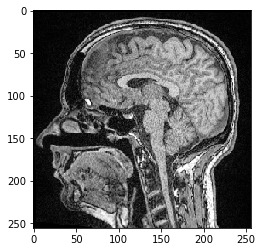

In [3]:
slice = image[100]

cle.imshow(slice)

## Bilder verschieben
Um den Unterschied zwischen den Koordinatensystemen etwas genauer zu erklären, werden wir jetzt eine affine Transformationsmatrix verwenden, um das Bild zu verschieben. Wir werden es um 100 Pixel in Y-Richtung (ZYX-System), auch bekannt als Dimension 1 (012-System), und -50 Pixel in X-Richtung, auch bekannt als Dimension 2, verschieben.

In [4]:
tz = 0
ty = 100
tx = -50

t0 = 0
t1 = 100
t2 = -50

Wenn Sie mit affinen Transformationsmatrizen noch nicht vertraut sind, gibt [dieser Wikipedia-Artikel](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation) einen guten Überblick.

### Bilder mit clesperanto verschieben
clesperanto folgt dem ZYX-System, und affine Transformationsmatrizen werden typischerweise in der folgenden Form geschrieben. Bitte beachten Sie, dass im sogenannten ZYX-System der Translationsvektor von oben nach unten x-y-z lautet.

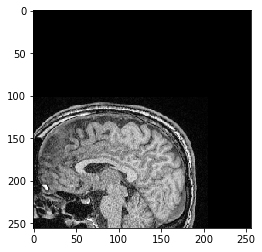

In [5]:
matrix = np.asarray([
 [1, 0, 0, tx],
 [0, 1, 0, ty],
 [0, 0, 1, tz],
 [0, 0, 0, 1],
])

cle_transformed = cle.affine_transform(image, transform=matrix)

cle.imshow(cle_transformed[100])

### Bilder mit scipy verschieben
In scipy, das dem 012-System folgt, sieht die Transformation so aus:

In [6]:
matrix = np.asarray([
 [1, 0, 0, t0],
 [0, 1, 0, t1],
 [0, 0, 1, t2],
 [0, 0, 0, 1],
])

Beachten Sie, dass die Funktion affine_transform in scipy eine Transformation erwartet, die die Transformation vom Ausgabebild zum Quellbild beschreibt. Dies ist die Inverse der oben definierten Transformationsmatrix. Daher rufen wir `inv()` auf, um die Matrix zu invertieren. Dies ist in Software, die affine Transformationen anwendet, sehr üblich. Es macht technisch gesehen Sinn, auch wenn es vielleicht nicht die intuitivste Art ist, mit Transformationen zu arbeiten.

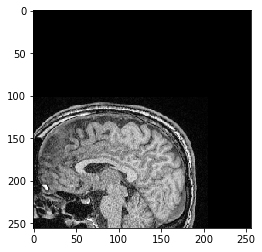

In [7]:
scipy_transformed = ndi.affine_transform(image, inv(matrix))

cle.imshow(scipy_transformed[100])

## Halten Sie es einfach
Um affine Transformationen und Koordinatensysteme einfach zu handhaben, haben wir in clesperanto eine `AffineTransform3D`-Klasse, die die Transformationsmatrizen für uns verwaltet, und wir müssen nicht mehr darüber nachdenken. Wir müssen nur daran denken, dass X von links nach rechts, Y von oben nach unten und Z von vorne nach hinten in unserem Bildstapel verläuft.

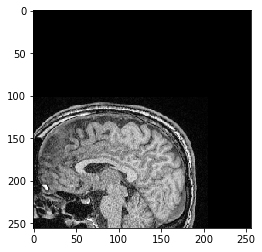

In [8]:
transform = cle.AffineTransform3D()
transform.translate(
    translate_x=tx,
    translate_y=ty,
    translate_z=tz
)

cle_translated2 = cle.affine_transform(image, transform=transform)

cle.imshow(cle_translated2[100])

Das Gleiche funktioniert auch mit Skalierung und Rotationen.

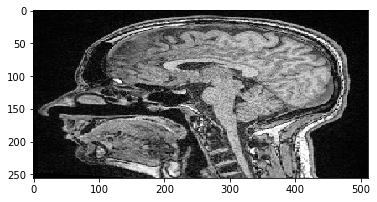

In [9]:
scale_factor = 2

transform = cle.AffineTransform3D()
transform.scale(scale_x=scale_factor)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])

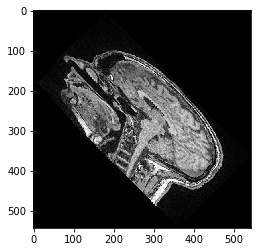

In [10]:
scale_factor = 2
rotation_angle = 45

transform = cle.AffineTransform3D()

transform.scale(scale_x=scale_factor)
transform.rotate_around_z_axis(rotation_angle)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])

Hinweis: Es macht einen Unterschied, ob Sie zuerst skalieren und dann rotieren oder zuerst rotieren und dann skalieren:

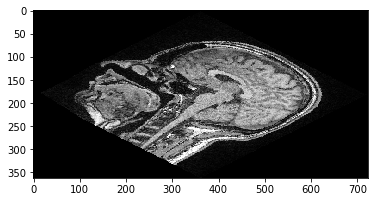

In [11]:
transform = cle.AffineTransform3D()

transform.rotate_around_z_axis(rotation_angle)
transform.scale(scale_x=scale_factor)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])